In [3]:
!pip install --upgrade tensorflow-io
import tensorflow as tf
import tensorflow_io as tfio
tf.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 33.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 54.0 MB/s eta 0:00:00:00:01
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.31.0
    Uninstalling tensorflow-io-gcs-filesystem-0.31.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.31.0
  Attempting uninstall: tensorflow-io
    Found existing installation: tensorflow-io 0.31.0
    Uninstalling tensorflow-io-0.31.0:
      Successfully uninstalled tensorflow-io-0.31.0


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


'2.12.0'

In [17]:
#3subd='/kaggle/working/alt_sources_test_disks/X'
#os.makedirs(subd,exist_ok=True)
#!rm -r alt_sources_test_disks/val

In [5]:
import pandas as pd,numpy as np,os,plotly.graph_objects as go,tensorflow as tf
from tensorflow import keras
from plotly.subplots import make_subplots
from scipy.ndimage import zoom

In [8]:
#create undersampled AltRowCol dataset
meas=pd.read_csv('/kaggle/input/grid-measurements-source-detector/measurement_list.csv')

In [61]:
for file in os.listdir('/kaggle/input/zscores/train/X/'):
    temp=np.load('/kaggle/input/zscores/train/X/'+file)
    meas['amp']=temp[:576]
    meas['phase']=temp[576:]
    Allch_amp_phase=meas[(meas['grid_pos_1']%2!=0) & (meas['grid_pos_2']%2!=0)] 
    temp=pd.concat([Allch_amp_phase['amp'],Allch_amp_phase['phase']],ignore_index=True)
    temp=np.array(temp.values)
    np.save('/kaggle/working/alt_sources/train/X/'+file,temp)
'''
    for file in os.listdir('/kaggle/input/zscores/val/X/'):
    temp=np.load('/kaggle/input/zscores/val/X/'+file)
    meas['amp']=temp[:576]
    meas['phase']=temp[576:]
    Allch_amp_phase=meas[(meas['grid_pos_1']%2!=0) & (meas['grid_pos_2']%2!=0)] 
    temp=pd.concat([Allch_amp_phase['amp'],Allch_amp_phase['phase']],ignore_index=True)
    temp=np.array(temp.values)
    np.save('/kaggle/working/alt_sources/val/X/'+file,temp)
'''

In [67]:
#!zip -r alt_sources.zip /kaggle/working/alt_sources
#from IPython.display import FileLink
#FileLink('alt_sources.zip')


In [ ]:
'''
#creating the source-detector positions matrix
meas=np.zeros((36,16), dtype=int)
start_value=[1,2,3]
col_factor=3
row_factor=48
meas[:3,0]=start_value
for i in range(3,36):
    meas[i,0]=meas[(i-3),0]+row_factor
for i in range(1,16):
    meas[:,i]=meas[:,i-1]+col_factor
meas.shape

#full grid
input_ampph=np.load('/kaggle/input/zscores/train/X/1.npy')
meas_amp=np.zeros((36,16),dtype=float)
for i in range(0,16):
    for j in range(0,36):
        index=meas[j,i]-1
        index=index.astype(int)
        meas_amp[j,i]=input_ampph[index]
meas_amp.shape
meas_ph=np.zeros((36,16),dtype=float)
for i in range(0,16):
    for j in range(0,36):
        index=meas[j,i]-1
        index=index.astype(int)
        meas_ph[j,i]=input_ampph[index+576]
meas_ph.shape
'''

In [4]:
x_train=[];y_train=[];w_train=[];x_val=[];y_val=[];w_val=[]
for file in np.sort(os.listdir('/kaggle/input/alt-sources-zscores/train/train/X/')):
    temp=np.load('/kaggle/input/alt-sources-zscores/train/train/X/'+file)
    x_train.append(temp)

for file in np.sort(os.listdir('/kaggle/input/zscores/train/Y/')):
    temp=np.load('/kaggle/input/zscores/train/Y/'+file)
    temp32=zoom(temp,[2,2,2]+[1],mode='reflect',order=1).astype('float32')
    y_train.append(temp32)

for file in np.sort(os.listdir('/kaggle/input/zscores/train/W/')):
    temp=np.load('/kaggle/input/zscores/train/W/'+file)
    temp32=zoom(temp,[2,2,2]+[1],mode='reflect',order=1).astype('float32')
    w_train.append(temp32)

for file in np.sort(os.listdir('/kaggle/input/alt-sources-zscores/val/val/X/')):
    temp=np.load('/kaggle/input/alt-sources-zscores/val/val/X/'+file)
    x_val.append(temp)

for file in np.sort(os.listdir('/kaggle/input/zscores/val/Y/')):
    temp=np.load('/kaggle/input/zscores/val/Y/'+file)
    temp32=zoom(temp,[2,2,2]+[1],mode='reflect',order=1).astype('float32')
    y_val.append(temp32)

for file in np.sort(os.listdir('/kaggle/input/zscores/val/W/')):
    temp=np.load('/kaggle/input/zscores/val/W/'+file)
    temp32=zoom(temp,[2,2,2]+[1],mode='reflect',order=1).astype('float32')
    w_val.append(temp32)


In [10]:
w_train[0].shape

(32, 32, 16, 2)

In [54]:
'''
for file in os.listdir('/kaggle/input/zscores/train/X/'):
    temp=np.load('/kaggle/input/zscores/train/X/'+file)
    meas['amp']=temp[:576]
    meas['phase']=temp[576:]
    Allch_amp_phase=meas[(meas['grid_pos_1']%2!=0) & (meas['grid_pos_2']%2!=0)] 
    temp=pd.concat([Allch_amp_phase['amp'],Allch_amp_phase['phase']],ignore_index=True)
    temp=np.array(temp.values)
    np.save('/kaggle/working/alt_sources/train/X/'+file+'.npy',temp)
'''

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Concatenate, MaxPooling3D, UpSampling3D, Multiply, Dropout, ZeroPadding2D, Flatten, Conv2D, Conv3D, Conv2DTranspose, Conv3DTranspose, BatchNormalization, Activation, Reshape, Concatenate, Dense
from tensorflow.keras.optimizers import Adamax, RMSprop
import numpy as np


def weighted_mse(y_true, y_pred, weights):
    sq_errors = tf.math.square(y_pred-y_true)
    weighted_sq_errors = sq_errors*weights
    return weighted_sq_errors


def fdnet(input_shape, output_shape, n_filters=64, kernel_size=5, fc_dropout=0.2, ac1='tanh', ac='relu', learning_rate=0.0001):

    input_meas = keras.Input(shape=input_shape)
    y_true = keras.Input(shape=output_shape)
    weights = keras.Input(shape=output_shape)

    x = Flatten()(input_meas)
    x = Dense(np.product(output_shape), activation=ac1)(x)
    x = Dropout(fc_dropout)(x)
    x = Reshape(output_shape)(x)

    x = Conv3D(filters=n_filters, kernel_size=kernel_size, activation=ac, padding='same')(x)
    x = MaxPooling3D((2,2,2))(x)
    x = Conv3D(filters=n_filters, kernel_size=kernel_size, activation=ac, padding='same')(x)
    x = Conv3DTranspose(n_filters, (2, 2, 2), strides=2, padding='same')(x)
    x = Conv3D(filters=n_filters, kernel_size=kernel_size, activation=ac, padding='same')(x)

    y_pred = Conv3D(filters=2, kernel_size=1, strides=1, padding='same', activation=ac)(x)

    model = keras.Model([input_meas, y_true, weights], y_pred)
    model.add_loss(weighted_mse(y_true, y_pred, weights))
    model.compile(optimizer=Adamax(learning_rate = learning_rate))


    final_model = keras.Model(input_meas, y_pred)

    return model, final_model


model_name='zscore_fdnet_undersampled32_alt_sources_Adamax'
model, final_model = fdnet(x_train[0].shape,y_train[0].shape)

history = model.fit([np.array(x_train),np.array(y_train),np.array(w_train)],None,
                    batch_size=64,verbose = 3,epochs=600,
                    validation_data=[[np.array(x_val),np.array(y_val),np.array(w_val)],None],
                    callbacks = [EarlyStopping(monitor='val_loss',
                                mode='min',
                                restore_best_weights=True,
                                verbose=3,patience=60)])



model.save('/kaggle/working/'+model_name)
model.save('/kaggle/working/zscore_fdnet_undersampled32_alt_sources_Adamax.h5')
train_losses = history.history['loss']
val_losses = history.history['val_loss']
#vis_train_loss(history,title='losses',savename='/kaggle/working/models/training_losses')

Epoch 1/600
Epoch 2/600
Epoch 3/600
Epoch 4/600
Epoch 5/600
Epoch 6/600
Epoch 7/600
Epoch 8/600
Epoch 9/600
Epoch 10/600
Epoch 11/600
Epoch 12/600
Epoch 13/600
Epoch 14/600
Epoch 15/600
Epoch 16/600
Epoch 17/600
Epoch 18/600
Epoch 19/600
Epoch 20/600
Epoch 21/600
Epoch 22/600
Epoch 23/600
Epoch 24/600
Epoch 25/600
Epoch 26/600
Epoch 27/600
Epoch 28/600
Epoch 29/600
Epoch 30/600
Epoch 31/600
Epoch 32/600
Epoch 33/600
Epoch 34/600
Epoch 35/600
Epoch 36/600
Epoch 37/600
Epoch 38/600
Epoch 39/600
Epoch 40/600
Epoch 41/600
Epoch 42/600
Epoch 43/600
Epoch 44/600
Epoch 45/600
Epoch 46/600
Epoch 47/600
Epoch 48/600
Epoch 49/600
Epoch 50/600
Epoch 51/600
Epoch 52/600
Epoch 53/600
Epoch 54/600
Epoch 55/600
Epoch 56/600
Epoch 57/600
Epoch 58/600
Epoch 59/600
Epoch 60/600
Epoch 61/600
Epoch 62/600
Epoch 63/600
Epoch 64/600
Epoch 65/600
Epoch 66/600
Epoch 67/600
Epoch 68/600
Epoch 69/600
Epoch 70/600
Epoch 71/600
Epoch 72/600
Epoch 73/600
Epoch 74/600
Epoch 75/600
Epoch 76/600
Epoch 77/600
Epoch 78

In [7]:
#final_model.summary()

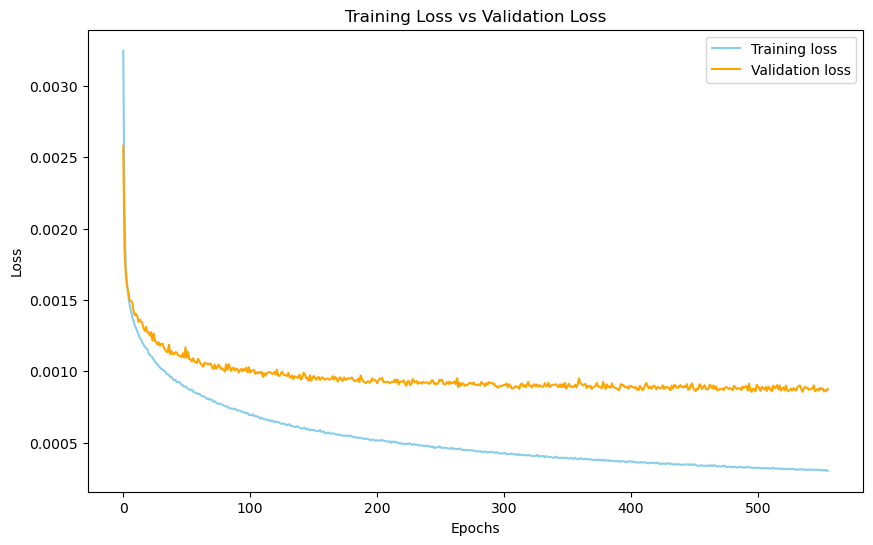

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(train_losses,label='Training loss',color='skyblue')
plt.plot(val_losses,label='Validation loss',color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()
plt.savefig('loss_plot_undersample32')
plt.show()

In [8]:
!cd /kaggle/working

In [13]:
!zip -r zscore_fdnet_undersampled32_alt_sources_Adamax.zip '/kaggle/working/zscore_fdnet_undersampled32_alt_sources_Adamax'
from IPython.display import FileLink
FileLink('zscore_fdnet_undersampled32_alt_sources_Adamax.zip')

  adding: kaggle/working/zscore_fdnet_undersampled32_alt_sources_Adamax/ (stored 0%)
  adding: kaggle/working/zscore_fdnet_undersampled32_alt_sources_Adamax/variables/ (stored 0%)
  adding: kaggle/working/zscore_fdnet_undersampled32_alt_sources_Adamax/variables/variables.index (deflated 66%)
  adding: kaggle/working/zscore_fdnet_undersampled32_alt_sources_Adamax/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: kaggle/working/zscore_fdnet_undersampled32_alt_sources_Adamax/keras_metadata.pb (deflated 92%)
  adding: kaggle/working/zscore_fdnet_undersampled32_alt_sources_Adamax/fingerprint.pb (stored 0%)
  adding: kaggle/working/zscore_fdnet_undersampled32_alt_sources_Adamax/assets/ (stored 0%)
  adding: kaggle/working/zscore_fdnet_undersampled32_alt_sources_Adamax/saved_model.pb (deflated 89%)


/kaggle/working/zscore_fdnet_undersampled32_alt_sources_Adamax.zip

In [23]:
for file in os.listdir('/kaggle/input/test-disks-zscores-x/X/'):
    temp=np.load('/kaggle/input/test-disks-zscores-x/X/'+file)
    meas['amp']=temp[:576]
    meas['phase']=temp[576:]
    Allch_amp_phase=meas[(meas['grid_pos_1']%2!=0) & (meas['grid_pos_2']%2!=0)] 
    temp=pd.concat([Allch_amp_phase['amp'],Allch_amp_phase['phase']],ignore_index=True)
    temp=np.array(temp.values)
    np.save('/kaggle/working/alt_sources_test_disks/X/'+file,temp)

In [ ]:
!zip -r alt_sources_test_disks.zip '/kaggle/working/alt_sources_test_disks'
from IPython.display import FileLink
FileLink('alt_sources_test_disks.zip')

In [6]:
import pickle
with open('/kaggle/input/zscores/factors.p', 'rb') as f:
    factor = pickle.load(f)
factors={}
factors['mean']=factor[0]
factors['std']=factor[1]
factors['mua_min']=factor[2]
factors['mua_range']=factor[3]
factors['mus_min']=factor[4]
factors['mus_range']=factor[5]
factors['dwn_factor']=factor[6]
factors['roi_factor']=factor[7]
factors

{'mean': array([ -9.76486598, -11.94126922, -13.68280513, ...,  22.52690221,
         36.74748799,  50.12313807]),
 'std': array([0.44787742, 0.63526332, 0.76196818, ..., 3.33164611, 5.36270396,
        7.41481909]),
 'mua_min': 0.004000351303254817,
 'mua_range': 0.031536837390914084,
 'mus_min': 0.5000241722787546,
 'mus_range': 2.492116532342978,
 'dwn_factor': [0.5, 0.5, 0.5],
 'roi_factor': 0.9066751953125}

In [7]:
loaded_model=tf.keras.models.load_model('/kaggle/input/models/zscore_fdnet_undersampled32_alt_sources_Adamax.h5')
final_model=keras.Model(loaded_model.input[0],loaded_model.output)

In [6]:
#temp=np.load('/kaggle/input/test-disks-zscores-x/alt_sources_test_disks/alt_sources_test_disks/alt_sources_test_disks/X/D10.npy')

In [5]:
y_pred=final_model()

ValueError: The first argument to `Layer.call` must always be passed.

In [8]:
!pip install -U Kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.0 MB/s eta 0:00:0000:0100:01


In [9]:
import scipy.io, numpy as np,plotly.io as pio
from scipy.ndimage import zoom
from plotly.subplots import make_subplots
from skimage.metrics import structural_similarity as compare_ssim
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
from skimage.metrics import structural_similarity as compare_ssim

In [42]:
temp=np.load('/kaggle/input/zscores/val/val/Y/10.npy')
temp32=zoom(temp,[2,2,2]+[1],mode='reflect',order=1).astype('float32')
#temp32.shape
#y_pred=final_model.predict(temp.reshape(1,-1))

In [37]:
y_pred_reshaped=np.squeeze(y_pred,0)

In [43]:
X, Y, Z = np.mgrid[:32, :32, :16]

fig = go.Figure(data=go.Volume(
    x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
    value=temp32[:,:,:,0].flatten(),
    isomin=np.min(np.min(temp32[:,:,:,0]))+(0*np.min(np.min(temp32[:,:,:,1]))),
    isomax=np.max(np.max(temp32[:,:,:,0])),
    opacity=0.5,
    surface_count=6,
    ))
fig.update_layout(scene_xaxis_showticklabels=False,
                  scene_yaxis_showticklabels=False,
                  scene_zaxis_showticklabels=False)
fig.show()

In [10]:
import scipy.io, numpy as np,plotly.io as pio
from scipy.ndimage import zoom
from plotly.subplots import make_subplots
from skimage.metrics import structural_similarity as compare_ssim
import matplotlib.pyplot as plt

In [11]:
file_name='D10_1.npy'
depth=file_name.split('_')[0][1:]
temp=np.load('/kaggle/input/test-disks-zscores-x/alt_sources_test_disks/alt_sources_test_disks/X/'+file_name).reshape(1,-1)
y_pred=final_model.predict(temp)
y_pred_reshaped=np.squeeze(y_pred,0)
rescaled_y_pred_mua=(y_pred_reshaped[:,:,:,0]*factors['mua_range'])+factors['mua_min']
rescaled_y_pred_mus=(y_pred_reshaped[:,:,:,1]*factors['mus_range'])+factors['mus_min']

temp_dict=scipy.io.loadmat('/kaggle/input/test-disks/test_disks/'+file_name[:-4]+'.mat')
#Y=zoom(temp_dict['target'],factors['dwn_factor']+[1],mode='reflect',order=1).astype('float32')
temp_y_mua=temp_dict['target'][:,:,:,0]
temp_y_mus=temp_dict['target'][:,:,:,1]

data_range_mua=np.max([np.max(rescaled_y_pred_mua),np.max(temp_y_mua)])-np.min([np.min(rescaled_y_pred_mua),np.min(temp_y_mua)])
ssim_value_mua = compare_ssim(rescaled_y_pred_mua, temp_y_mua, channel_axis=-1,data_range=data_range_mua)
data_range_mus=np.max([np.max(rescaled_y_pred_mus),np.max(temp_y_mus)])-np.min([np.min(rescaled_y_pred_mus),np.min(temp_y_mus)])
ssim_value_mus = compare_ssim(rescaled_y_pred_mus, temp_y_mus, channel_axis=-1,data_range=data_range_mus)


'mua'
''
legend_coord=[[0.4,0.78],[0.98,0.78],[0.4,0.2],[0.98,0.2]]
X, Y, Z = np.mgrid[:32, :32, :16]

fig1 = go.Figure(data=go.Volume(
    x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
    value=rescaled_y_pred_mua.flatten(),
    isomin=np.min(np.min(rescaled_y_pred_mua))+(0*np.min(np.min(rescaled_y_pred_mua))),
    isomax=np.max(np.max(rescaled_y_pred_mua)),
    opacity=0.5,
    surface_count=6,
    colorbar=dict(len=0.4,x=legend_coord[0][0],y=legend_coord[0][1])
    ))
fig1.update_layout(scene_xaxis_showticklabels=False,
                  scene_yaxis_showticklabels=False,
                  scene_zaxis_showticklabels=False)
''
''
''
'Ground truth-mua'
''
X, Y, Z = np.mgrid[:32, :32, :16]

fig2 = go.Figure(data=go.Volume(
    x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
    value=temp_y_mua.flatten(),
    isomin=np.min(np.min(temp_y_mua))+(0*np.min(np.min(temp_y_mua))),
    isomax=np.max(np.max(temp_y_mua)),
    opacity=0.5,
    surface_count=6,
    colorbar=dict(len=0.4,x=legend_coord[1][0],y=legend_coord[1][1])
    ))
fig2.update_layout(scene_xaxis_showticklabels=False,
                  scene_yaxis_showticklabels=False,
                  scene_zaxis_showticklabels=False)
''
''
''
'mus'
''
X, Y, Z = np.mgrid[:32, :32, :16]

fig3 = go.Figure(data=go.Volume(
    x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
    value=rescaled_y_pred_mus.flatten(),
    isomin=np.min(np.min(rescaled_y_pred_mus))+(0*np.min(np.min(rescaled_y_pred_mus))),
    isomax=np.max(np.max(rescaled_y_pred_mus)),
    opacity=0.5,
    surface_count=6,
    colorbar=dict(len=0.4,x=legend_coord[2][0],y=legend_coord[2][1])
    ))
fig3.update_layout(scene_xaxis_showticklabels=False,
                  scene_yaxis_showticklabels=False,
                  scene_zaxis_showticklabels=False)
''
''
''
'Ground truth-mus'
''
X, Y, Z = np.mgrid[:32, :32, :16]

fig4 = go.Figure(data=go.Volume(
    x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
    value=temp_y_mus.flatten(),
    isomin=np.min(np.min(temp_y_mus))+(0*np.min(np.min(temp_y_mus))),
    isomax=np.max(np.max(temp_y_mus)),
    opacity=0.5,
    surface_count=6,
    colorbar=dict(len=0.4,x=legend_coord[3][0],y=legend_coord[3][1])
    ))
fig4.update_layout(scene_xaxis_showticklabels=False,
                  scene_yaxis_showticklabels=False,
                  scene_zaxis_showticklabels=False)
''
''
''
fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'scene'}, {'type': 'scene'}],[{'type': 'scene'},{'type': 'scene'}]])
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
for trace in fig3.data:
    fig.add_trace(trace, row=2, col=1)
for trace in fig4.data:
    fig.add_trace(trace, row=2, col=2)
fig.update_layout(title_text='Depth - '+depth+' mm',width=1000, height=800, annotations=[
        dict(text="Alternate source posistions-mua<br>SSIM: {:.6f}".format(ssim_value_mua), x=0.2, y=1, xref="paper", yref="paper", showarrow=False),
        dict(text="Ground truth-mua", x=0.8, y=1, xref="paper", yref="paper", showarrow=False),
        dict(text="Alternate source posistions-mus<br>SSIM: {:.6f}".format(ssim_value_mus), x=0.2, y=0.45, xref="paper", yref="paper", showarrow=False),
        dict(text="Ground truth-mus", x=0.8, y=0.45, xref="paper", yref="paper", showarrow=False)
    ])
pio.write_image(fig, "/kaggle/working/undersampled32_"+depth+".png",format="png")
pio.write_image(fig, "/kaggle/working/undersampled32_"+depth+".svg",format="svg")
fig.show()

1/1 [==============================] - 1s 585ms/step


Processing lesion 1...
Localization Error: 1.3002401771978969
Effective Resolution: 8.21667558164168
Processing lesion 2...
Localization Error: 0.7669015130294335
Effective Resolution: 10.20406161025774


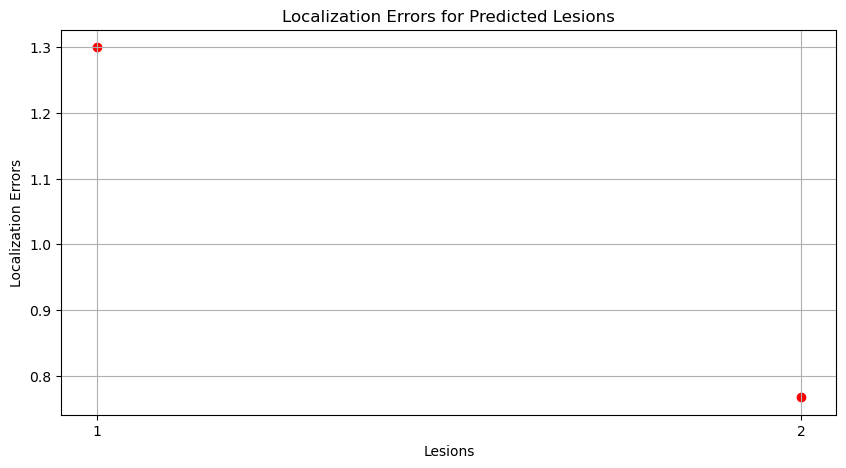

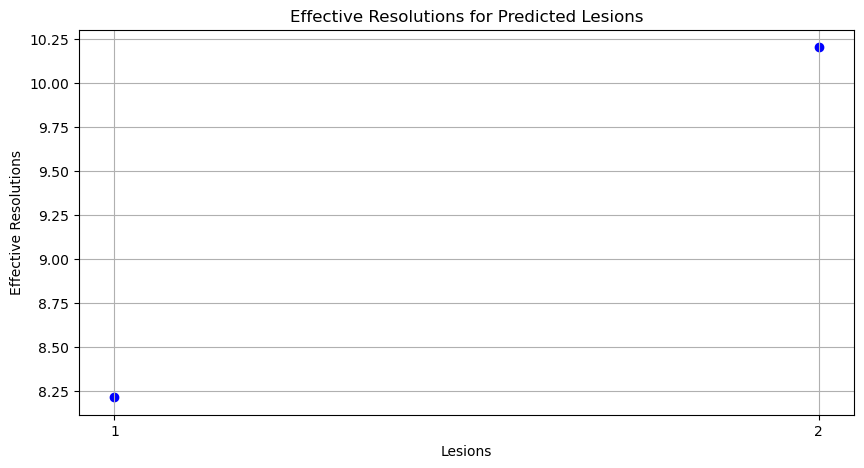

In [20]:
import numpy as np
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt

def get_lesion_centroids(volume, threshold=0.010):
    binary_mask = volume > threshold
    labeled, num_features = ndi.label(binary_mask)
    centroids = []
    for i in range(1, num_features + 1):
        lesion_data = labeled == i
        coords = np.argwhere(lesion_data)
        centroid = coords.mean(axis=0)
        centroids.append(centroid)
    return centroids

def extract_lesion_roi(volume, threshold):
    binary_mask = volume > threshold
    labeled, num_features = ndi.label(binary_mask)
    rois = []
    for i in range(1, num_features + 1):
        lesion_data = volume * (labeled == i)
        if np.any(lesion_data):
            rois.append(lesion_data)
    return rois

def compute_localization_error(predicted_centroid, ground_truth_centroid):
    return np.linalg.norm(np.array(predicted_centroid) - np.array(ground_truth_centroid))

def compute_effective_resolution(predicted_roi, ground_truth_centroid):
    coords = np.argwhere(predicted_roi)
    distances = [np.linalg.norm(coord - ground_truth_centroid) for coord in coords]
    max_distance = max(distances)
    # Diameter of the sphere
    return 2 * max_distance

# Example usage:

predicted_volume = rescaled_y_pred_mua  # Your predicted volume
ground_truth_volume = temp_y_mua  # Your ground truth volume

threshold = 0.010  # adjust as per your requirement
predicted_centroids = get_lesion_centroids(predicted_volume, threshold)
ground_truth_centroids = get_lesion_centroids(ground_truth_volume, threshold)

predicted_rois = extract_lesion_roi(predicted_volume, threshold)
ground_truth_rois = extract_lesion_roi(ground_truth_volume, threshold)

localization_errors = []
effective_resolutions = []

for i, (predicted_roi, gt_roi) in enumerate(zip(predicted_rois, ground_truth_rois)):
    print(f"Processing lesion {i+1}...")

    # Compute localization error
    localization_error = compute_localization_error(predicted_centroids[i], ground_truth_centroids[i])
    print(f"Localization Error: {localization_error}")
    localization_errors.append(localization_error)

    # Compute effective resolution
    effective_res = compute_effective_resolution(predicted_roi, ground_truth_centroids[i])
    print(f"Effective Resolution: {effective_res}")
    effective_resolutions.append(effective_res)
    
lesions = list(range(1, len(localization_errors)+1))
# Plot for localization errors
plt.figure(figsize=(10, 5))
plt.scatter(lesions, localization_errors, color='r', marker='o')
plt.xlabel('Lesions')
plt.ylabel('Localization Errors')
plt.title('Localization Errors for Predicted Lesions')
plt.xticks(lesions)
plt.grid(True)
plt.show()

# Plot for effective resolutions
plt.figure(figsize=(10, 5))
plt.scatter(lesions, effective_resolutions, color='b', marker='o')
plt.xlabel('Lesions')
plt.ylabel('Effective Resolutions')
plt.title('Effective Resolutions for Predicted Lesions')
plt.xticks(lesions)
plt.grid(True)
plt.show()

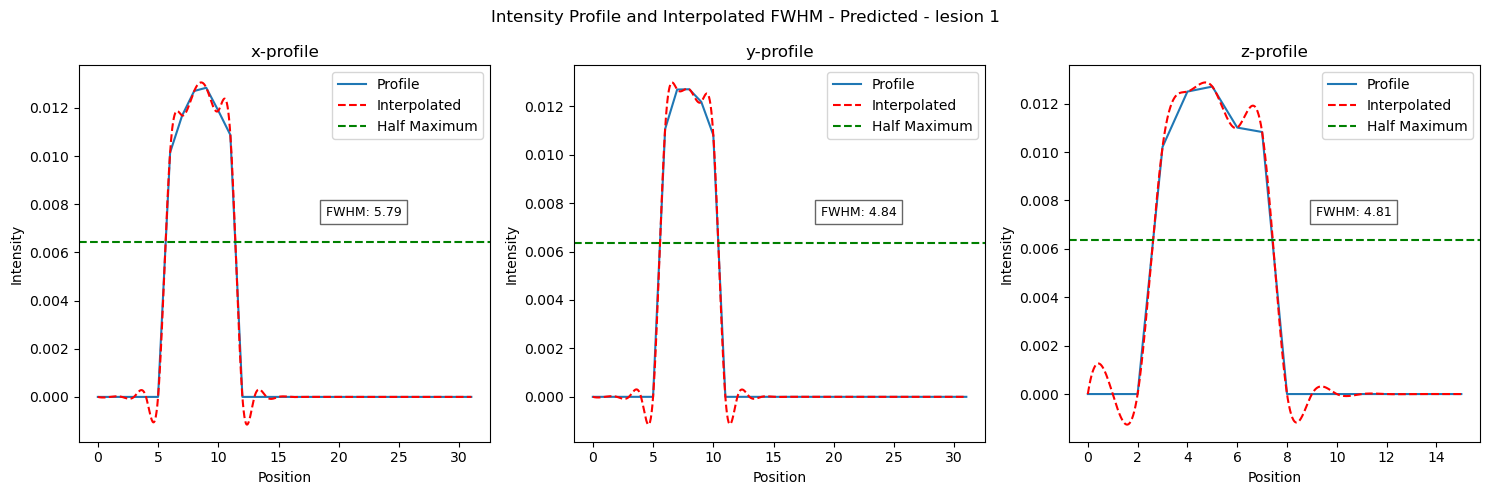

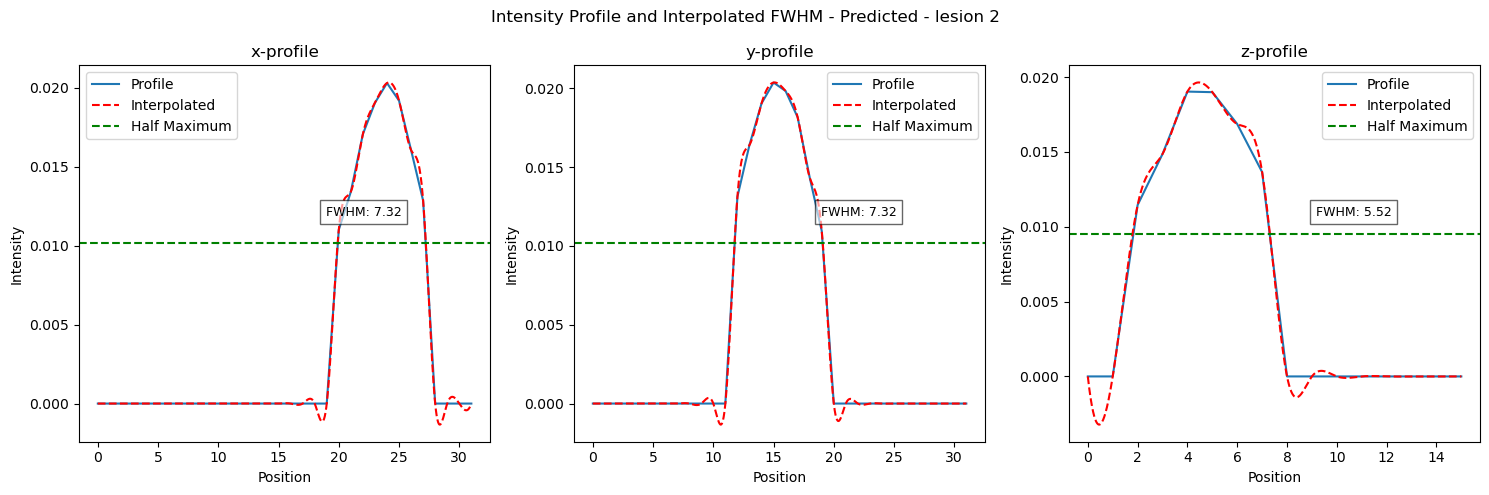

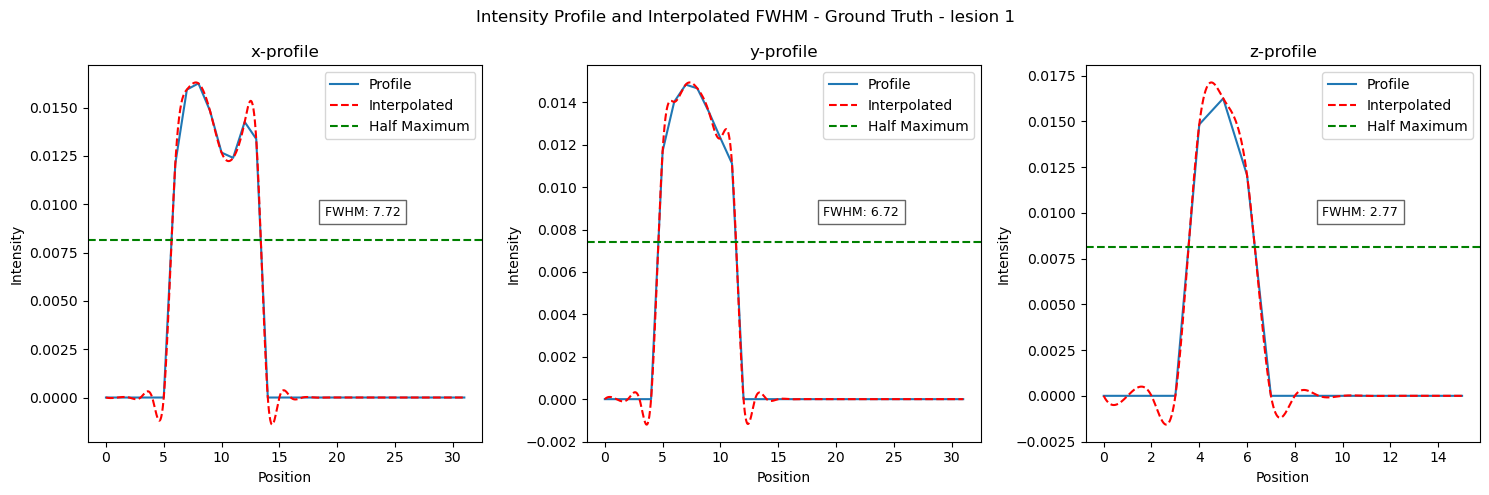

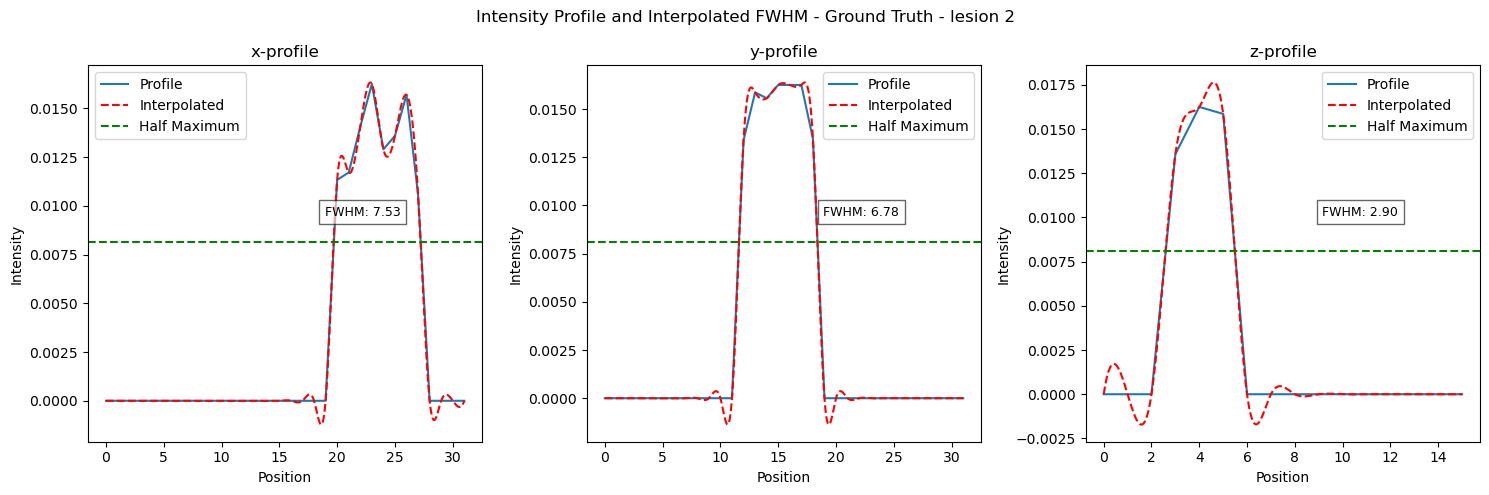

[[5.792455526090946, 4.839721248728294, 4.810994648431137, 7.324519907948378, 7.322108018848935, 5.519643446923325], [7.723440064616273, 6.717899416822872, 2.7734734211592946, 7.5303030150130255, 6.783684896439116, 2.899141659828855]]


In [15]:
import numpy as np
import scipy.ndimage as ndi
from scipy.signal import find_peaks
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

def extract_lesion_roi(volume, threshold):
    binary_mask = volume > threshold
    labeled, num_features = ndi.label(binary_mask)
    rois = []
    for i in range(1, num_features + 1):
        lesion_data = volume * (labeled == i)
        if np.any(lesion_data):
            rois.append(lesion_data)
    return rois

def extract_profiles(roi):
    coords = np.argwhere(roi)
    centroid = coords.mean(axis=0).astype(int)
    profile_x = roi[:,centroid[1], centroid[2]]
    profile_y = roi[centroid[0], :, centroid[2]]
    profile_z= roi[centroid[0], centroid[1],:]
    return profile_x, profile_y, profile_z

def compute_fwhm(profile):
    half_max = np.max(profile) / 2.0
    spline = UnivariateSpline(range(len(profile)), profile - half_max, s=0)
    roots = spline.roots()
    if len(roots) >= 2:
        return abs(roots[-1] - roots[0])
    return 0

# Example usage:
volume1 = rescaled_y_pred_mua  # Replace with your volume
volume2 = temp_y_mua  # Replace with your volume

threshold = 0.010  # Adjust based on your data

volumes = [volume1, volume2]
volume_name=['Predicted','Ground Truth']
roi_names=['lesion 1', 'lesion 2']
fwhms = []

for volume,vname in zip(volumes,volume_name):
    rois = extract_lesion_roi(volume, threshold)
    fwhm_values = []

    for roi,rname in zip(rois,roi_names):
        profiles = extract_profiles(roi)
        profile_names = ["x-profile", "y-profile", "z-profile"]
        
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        for idx, (profile, name) in enumerate(zip(profiles, profile_names)):
            if profile.ndim > 1:
                interpolated_profile = profile.sum(axis=1)
            else:
                interpolated_profile = profile
            fwhm = compute_fwhm(interpolated_profile)
            fwhm_values.append(fwhm)

            x = np.linspace(0, len(interpolated_profile)-1, 1000)
            spline = UnivariateSpline(range(len(interpolated_profile)), interpolated_profile - np.max(interpolated_profile) / 2.0, s=0)
            axes[idx].plot(interpolated_profile, label='Profile')
            axes[idx].plot(x, spline(x) + np.max(interpolated_profile) / 2.0, 'r--', label='Interpolated')
            axes[idx].axhline(y=np.max(interpolated_profile)/2.0, color='g', linestyle='--', label='Half Maximum')
            axes[idx].text(0.6, 0.6, f'FWHM: {fwhm:.2f}', transform=axes[idx].transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.6))  # Display FWHM on the graph
            axes[idx].set_title(name)
            axes[idx].set_xlabel("Position")
            axes[idx].set_ylabel("Intensity")
            legend = axes[idx].legend()
            
        
        fig.suptitle("Intensity Profile and Interpolated FWHM - " + vname+" - "+rname)
        plt.tight_layout()
        plt.show()

    fwhms.append(fwhm_values)

print(fwhms)


Processing lesion 1...
Localization Error: 1.5650590250767569
Effective Resolution: 15.31247967617071
Processing lesion 2...
Localization Error: 0.9189093957375378
Effective Resolution: 10.57540963490719


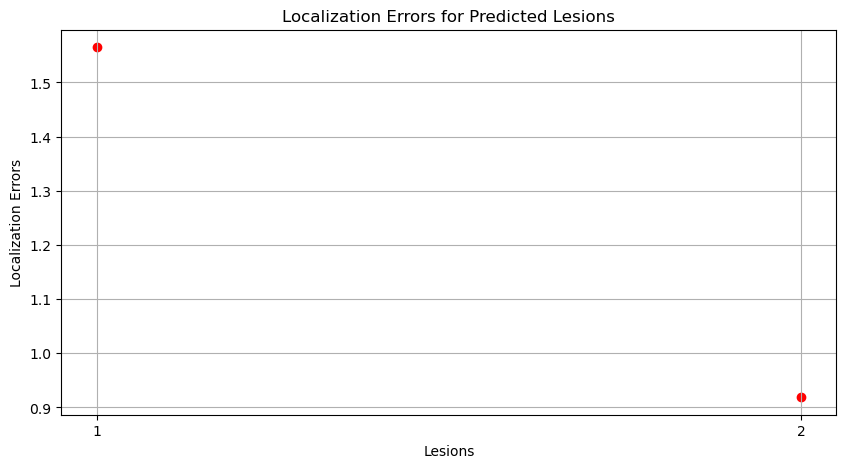

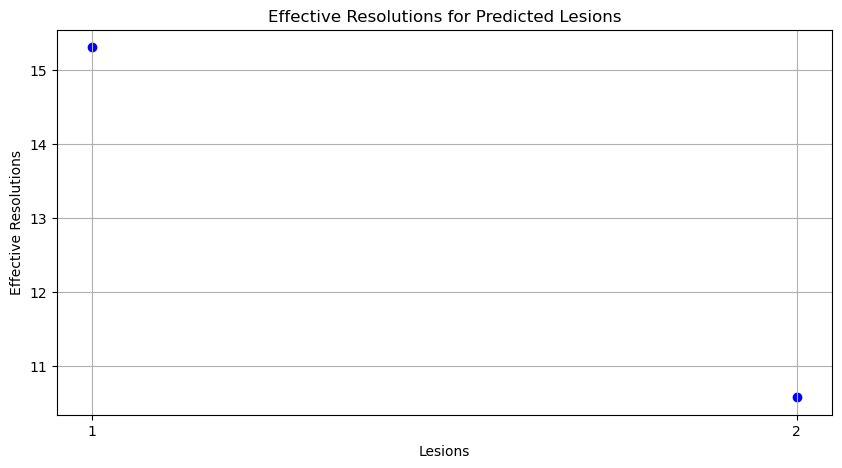

In [54]:
#mus-LOCA & ER
import numpy as np
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt

def get_lesion_centroids(volume, threshold=0.010):
    binary_mask = volume > threshold
    labeled, num_features = ndi.label(binary_mask)
    centroids = []
    for i in range(1, num_features + 1):
        lesion_data = labeled == i
        coords = np.argwhere(lesion_data)
        centroid = coords.mean(axis=0)
        centroids.append(centroid)
    return centroids

def compute_localization_error(predicted_centroid, ground_truth_centroid):
    return np.linalg.norm(np.array(predicted_centroid) - np.array(ground_truth_centroid))

def compute_effective_resolution(predicted_roi, ground_truth_centroid):
    coords = np.argwhere(predicted_roi)
    distances = [np.linalg.norm(coord - ground_truth_centroid) for coord in coords]
    max_distance = max(distances)
    # Diameter of the sphere
    return 2 * max_distance

# Example usage:

predicted_volume = rescaled_y_pred_mus  # Your predicted volume
ground_truth_volume = temp_y_mus  # Your ground truth volume

threshold = 0.83  # adjust as per your requirement
predicted_centroids = get_lesion_centroids(predicted_volume, threshold)
ground_truth_centroids = get_lesion_centroids(ground_truth_volume, threshold)

predicted_rois = extract_lesion_roi(predicted_volume, threshold)
ground_truth_rois = extract_lesion_roi(ground_truth_volume, threshold)

localization_errors = []
effective_resolutions = []

for i, (predicted_roi, gt_roi) in enumerate(zip(predicted_rois, ground_truth_rois)):
    print(f"Processing lesion {i+1}...")

    # Compute localization error
    localization_error = compute_localization_error(predicted_centroids[i], ground_truth_centroids[i])
    print(f"Localization Error: {localization_error}")
    localization_errors.append(localization_error)

    # Compute effective resolution
    effective_res = compute_effective_resolution(predicted_roi, ground_truth_centroids[i])
    print(f"Effective Resolution: {effective_res}")
    effective_resolutions.append(effective_res)
    
lesions = list(range(1, len(localization_errors)+1))
# Plot for localization errors
plt.figure(figsize=(10, 5))
plt.scatter(lesions, localization_errors, color='r', marker='o')
plt.xlabel('Lesions')
plt.ylabel('Localization Errors')
plt.title('Localization Errors for Predicted Lesions')
plt.xticks(lesions)
plt.grid(True)
plt.show()

# Plot for effective resolutions
plt.figure(figsize=(10, 5))
plt.scatter(lesions, effective_resolutions, color='b', marker='o')
plt.xlabel('Lesions')
plt.ylabel('Effective Resolutions')
plt.title('Effective Resolutions for Predicted Lesions')
plt.xticks(lesions)
plt.grid(True)
plt.show()

In [60]:
X, Y, Z = np.mgrid[:32, :32, :16]
fig2 = go.Figure(data=go.Volume(
    x=X.flatten(), y=Y.flatten(), z=Z.flatten(),
    value=ground_truth_rois[1].flatten(),
    isomin=np.min(np.min(predicted_rois[0]))+(0*np.min(np.min(predicted_rois[0]))),
    isomax=np.max(np.max(predicted_rois[0])),
    opacity=0.5,
    surface_count=6,
    colorbar=dict(len=0.4,x=legend_coord[1][0],y=legend_coord[1][1])
    ))
fig2.show()

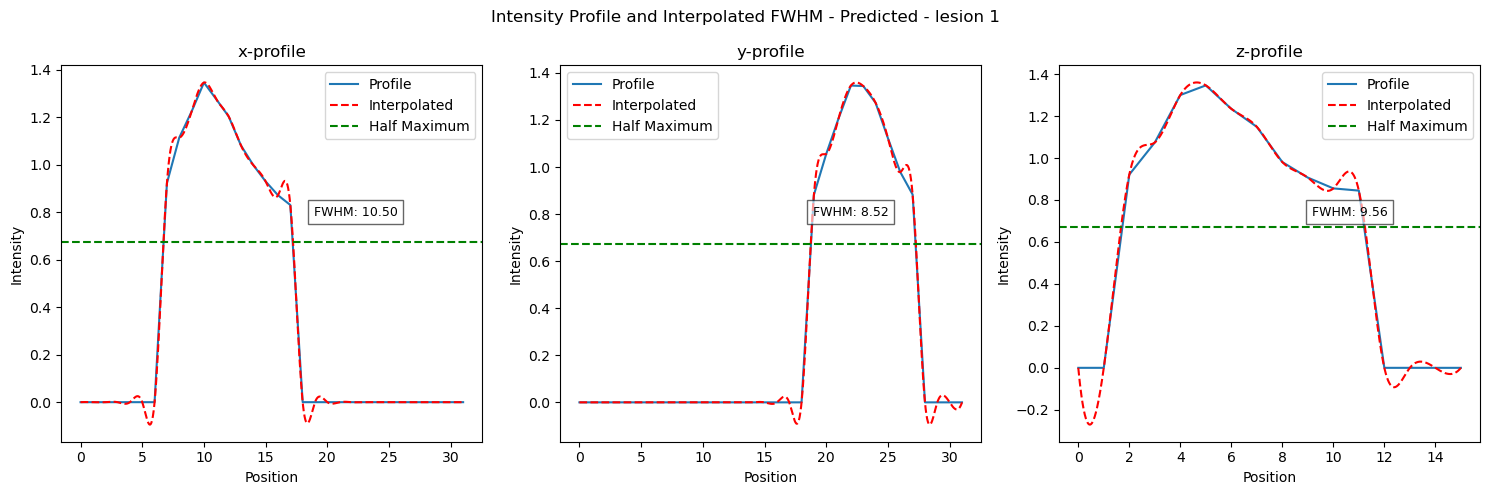

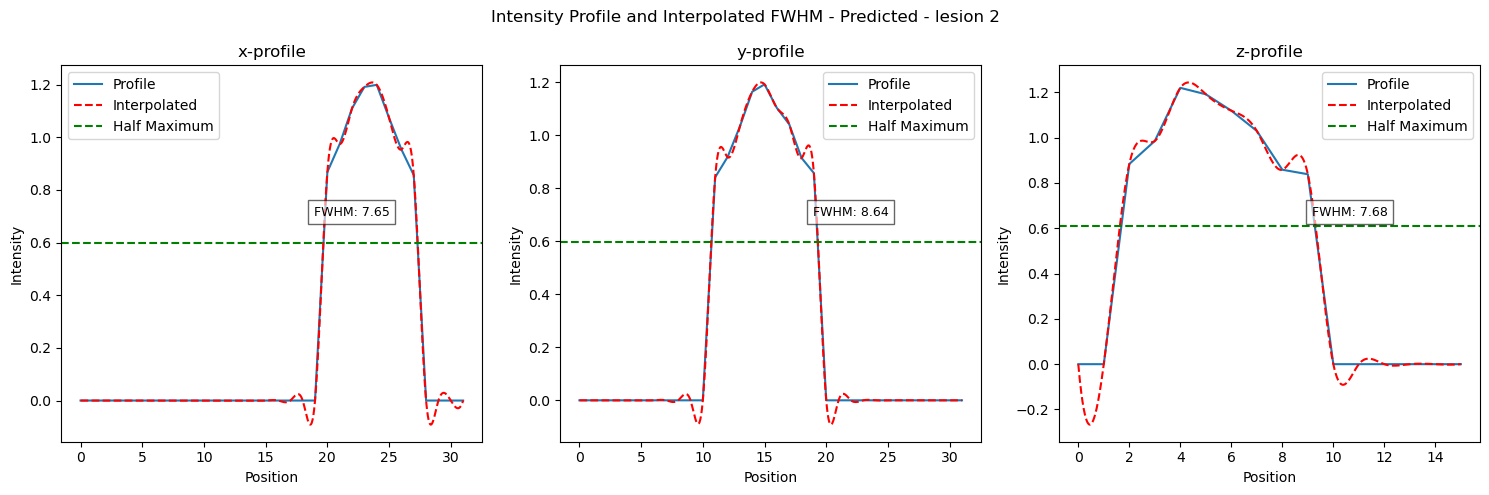

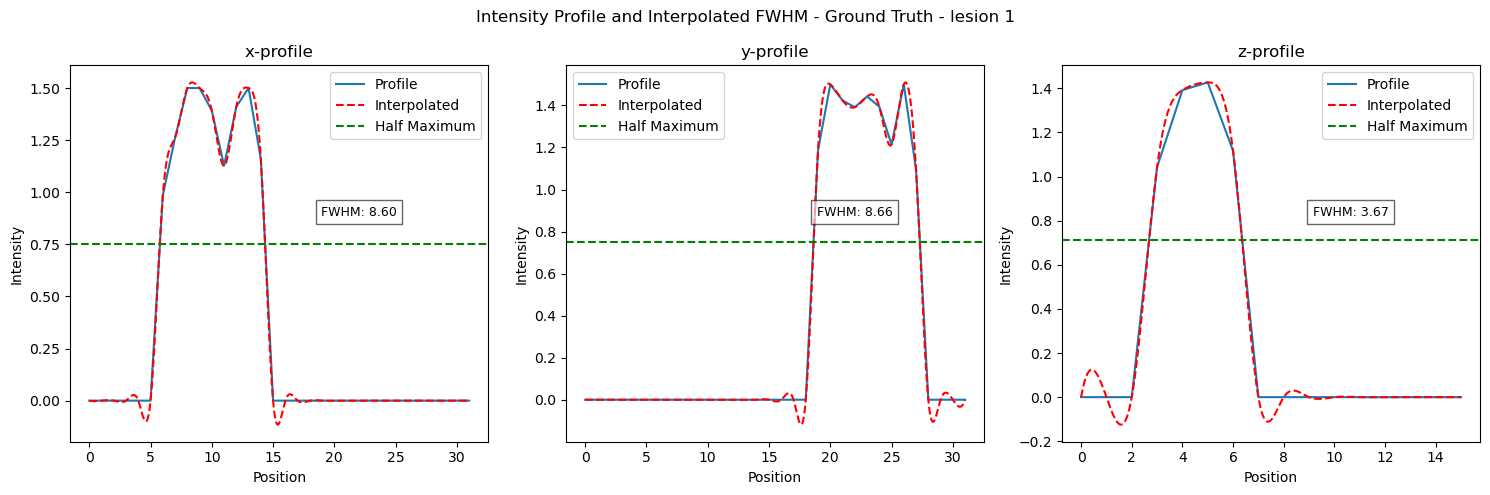

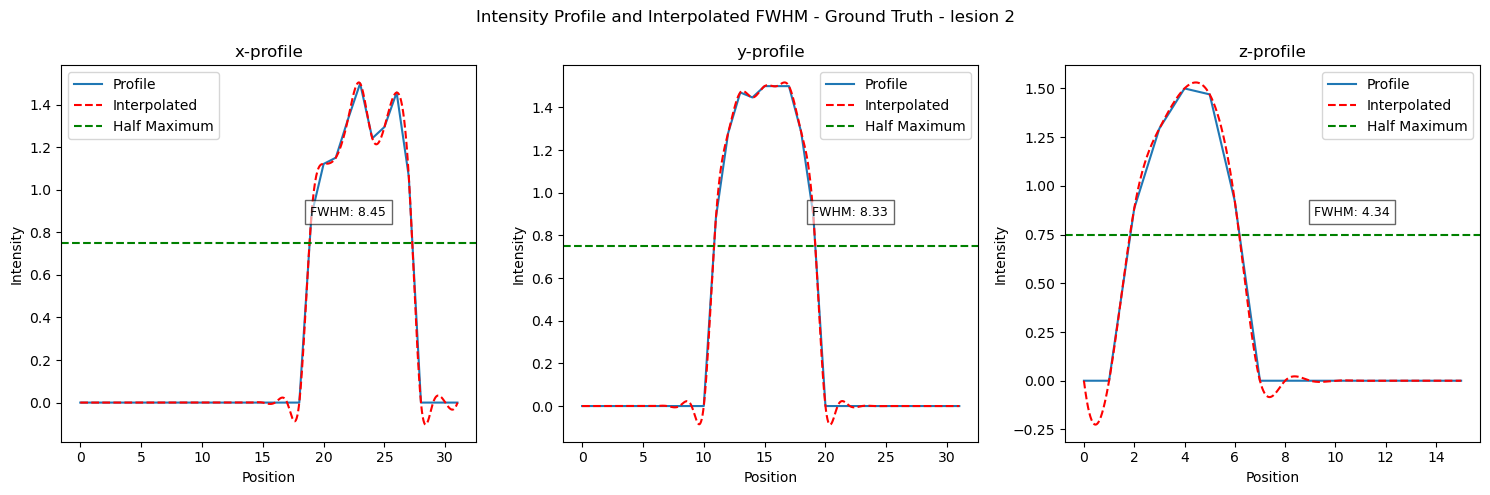

[[10.504936072208663, 8.518760635163169, 9.56076379905157, 7.647627642733973, 8.643396070455996, 7.6750508723950706], [8.5972472536073, 8.660353419543952, 3.670479106855802, 8.445418480536176, 8.325251566547143, 4.343585432423646]]


In [57]:
import numpy as np
import scipy.ndimage as ndi
from scipy.signal import find_peaks
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

def extract_lesion_roi(volume, threshold):
    binary_mask = volume > threshold
    labeled, num_features = ndi.label(binary_mask)
    rois = []
    for i in range(1, num_features + 1):
        lesion_data = volume * (labeled == i)
        if np.any(lesion_data):
            rois.append(lesion_data)
    return rois

def extract_profiles(roi):
    coords = np.argwhere(roi)
    centroid = coords.mean(axis=0).astype(int)
    profile_x = roi[:,centroid[1], centroid[2]]
    profile_y = roi[centroid[0], :, centroid[2]]
    profile_z= roi[centroid[0], centroid[1],:]
    return profile_x, profile_y, profile_z

def compute_fwhm(profile):
    half_max = np.max(profile) / 2.0
    spline = UnivariateSpline(range(len(profile)), profile - half_max, s=0)
    roots = spline.roots()
    if len(roots) >= 2:
        return abs(roots[-1] - roots[0])
    return 0

# Example usage:
volume1 = rescaled_y_pred_mus  # Replace with your volume
volume2 = temp_y_mus  # Replace with your volume

threshold = 0.83  # Adjust based on your data

volumes = [volume1, volume2]
volume_name=['Predicted','Ground Truth']
roi_names=['lesion 1', 'lesion 2']
fwhms = []

for volume,vname in zip(volumes,volume_name):
    rois = extract_lesion_roi(volume, threshold)
    fwhm_values = []

    for roi,rname in zip(rois,roi_names):
        profiles = extract_profiles(roi)
        profile_names = ["x-profile", "y-profile", "z-profile"]
        
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        for idx, (profile, name) in enumerate(zip(profiles, profile_names)):
            if profile.ndim > 1:
                interpolated_profile = profile.sum(axis=1)
            else:
                interpolated_profile = profile
            fwhm = compute_fwhm(interpolated_profile)
            fwhm_values.append(fwhm)

            x = np.linspace(0, len(interpolated_profile)-1, 1000)
            spline = UnivariateSpline(range(len(interpolated_profile)), interpolated_profile - np.max(interpolated_profile) / 2.0, s=0)
            axes[idx].plot(interpolated_profile, label='Profile')
            axes[idx].plot(x, spline(x) + np.max(interpolated_profile) / 2.0, 'r--', label='Interpolated')
            axes[idx].axhline(y=np.max(interpolated_profile)/2.0, color='g', linestyle='--', label='Half Maximum')
            axes[idx].text(0.6, 0.6, f'FWHM: {fwhm:.2f}', transform=axes[idx].transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.6))  # Display FWHM on the graph
            axes[idx].set_title(name)
            axes[idx].set_xlabel("Position")
            axes[idx].set_ylabel("Intensity")
            legend = axes[idx].legend()
            
        
        fig.suptitle("Intensity Profile and Interpolated FWHM - " + vname+" - "+rname)
        plt.tight_layout()
        plt.show()

    fwhms.append(fwhm_values)

print(fwhms)


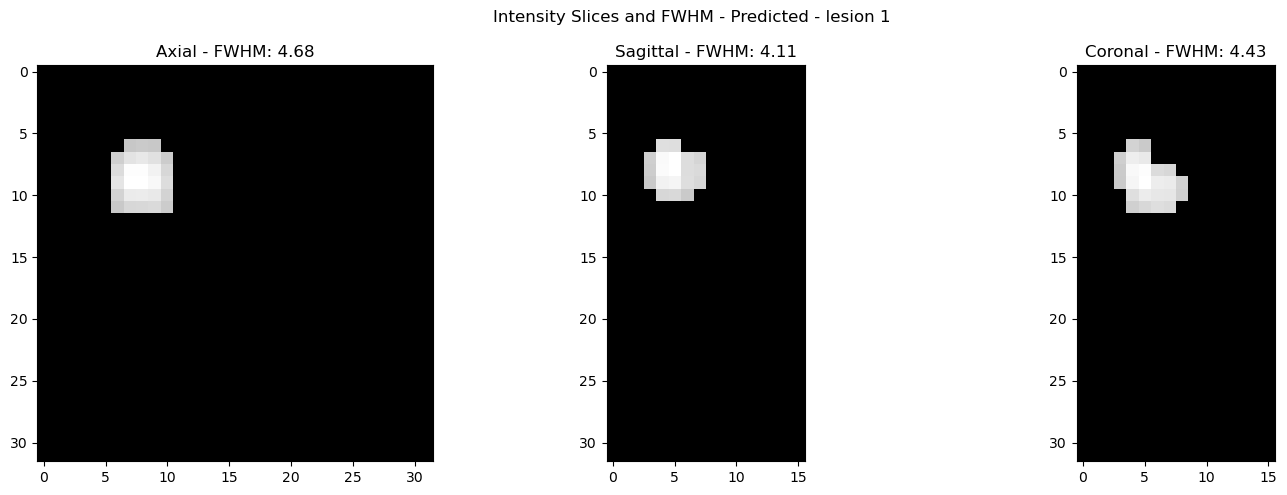

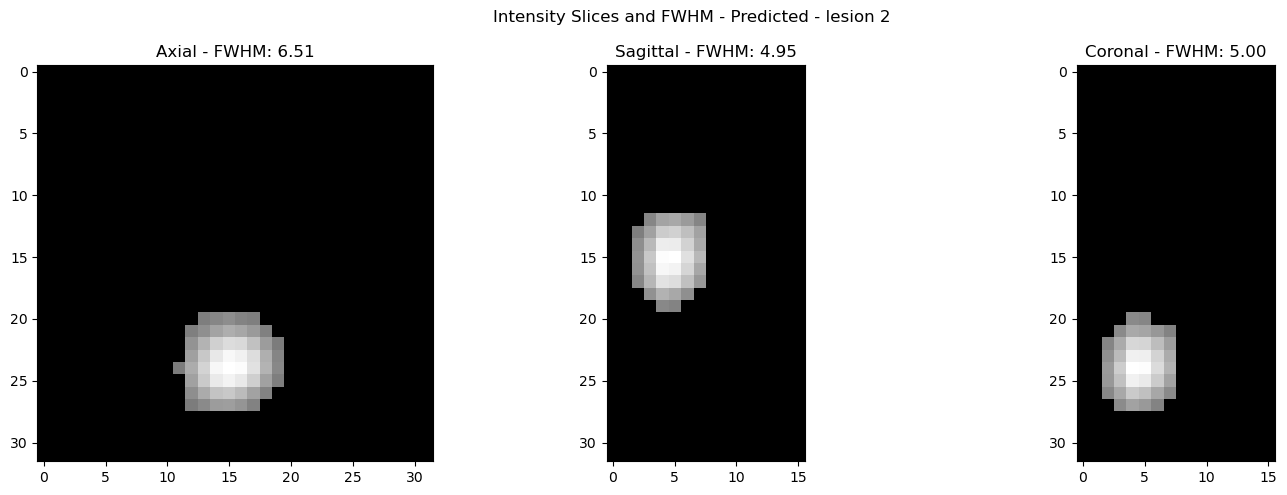

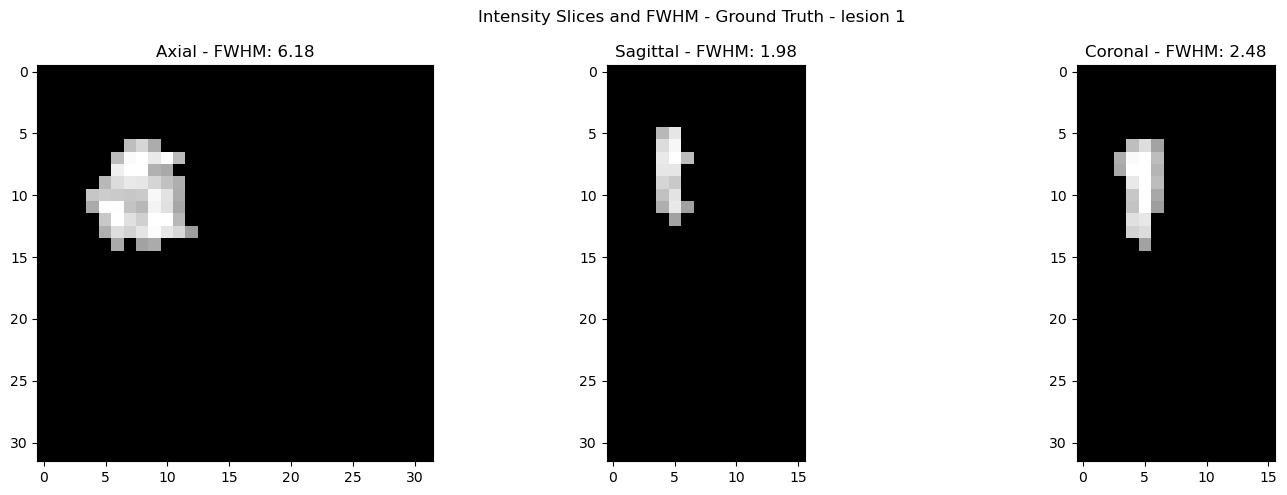

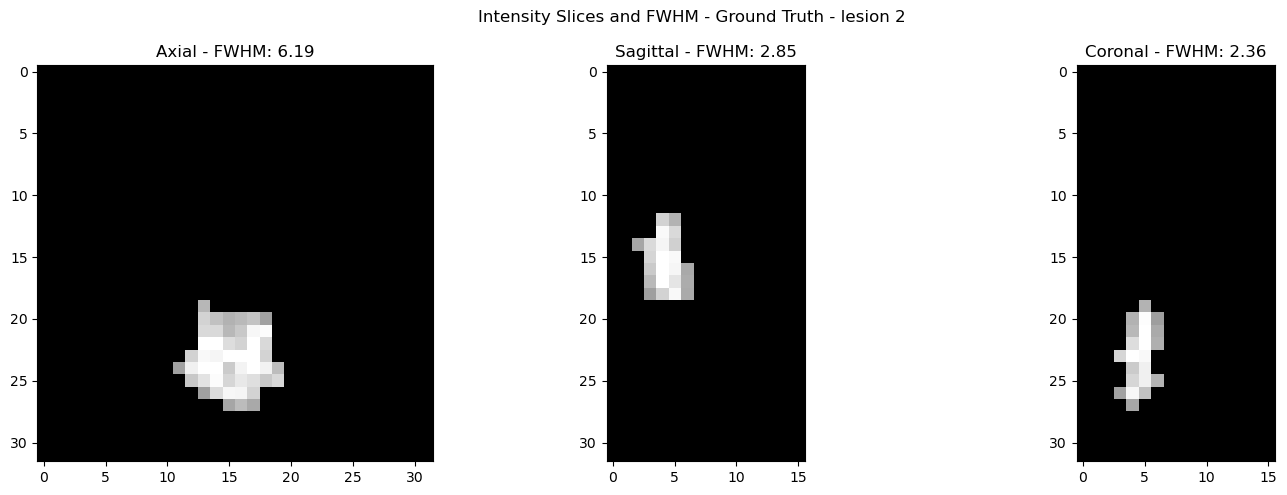

[[4.676567620049828, 4.110731022010993, 4.426461415649424, 6.508284553316377, 4.946491512409655, 5.0008948277869045], [6.1794266700564915, 1.9807794446556954, 2.4776921616838905, 6.194522118581693, 2.845967422200463, 2.355226826756766]]


In [13]:
import numpy as np
import scipy.ndimage as ndi
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

def extract_lesion_roi(volume, threshold):
    binary_mask = volume > threshold
    labeled, num_features = ndi.label(binary_mask)
    rois = []
    for i in range(1, num_features + 1):
        lesion_data = volume * (labeled == i)
        if np.any(lesion_data):
            rois.append(lesion_data)
    return rois

def extract_slices(roi):
    coords = np.argwhere(roi)
    centroid = coords.mean(axis=0).astype(int)
    
    Axial = roi[:, :, centroid[2]]
    Sagittal = roi[centroid[0], :, :]
    Coronal = roi[:, centroid[1], :]
    
    return Axial, Sagittal, Coronal

def compute_fwhm(profile):
    half_max = np.max(profile) / 2.0
    spline = UnivariateSpline(range(len(profile)), profile - half_max, s=0)
    roots = spline.roots()
    if len(roots) >= 2:
        return abs(roots[-1] - roots[0])
    return 0

# Sample 3D volumes for testing. 
# Replace these with your actual volumes.
volume1 = rescaled_y_pred_mua
volume2 = temp_y_mua

threshold = 0.010  # Adjust based on your data
volumes = [volume1, volume2]
volume_name = ['Predicted', 'Ground Truth']
roi_names = ['lesion 1', 'lesion 2']
fwhms = []

for volume, vname in zip(volumes, volume_name):
    rois = extract_lesion_roi(volume, threshold)
    fwhm_values = []

    for roi, rname in zip(rois, roi_names):
        slices = extract_slices(roi)
        slice_names = ["Axial", "Sagittal", "Coronal"]
        
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        for idx, (slice_, name) in enumerate(zip(slices, slice_names)):
            max_intensity = slice_.max()
            half_max = max_intensity / 2.0
            
            # Take a mean profile of the slice for FWHM calculation
            mean_profile = slice_.mean(axis=0)
            fwhm = compute_fwhm(mean_profile)
            fwhm_values.append(fwhm)

            axes[idx].imshow(slice_, cmap='gray') # display the slice
            axes[idx].set_title(name + f' - FWHM: {fwhm:.2f}')
            
        fig.suptitle("Intensity Slices and FWHM - " + vname + " - " + rname)
        plt.tight_layout()
        plt.show()

    fwhms.append(fwhm_values)

print(fwhms)

In [ ]:
[[4.810994648431137, 4.839721248728294, 5.792455526090946, 5.519643446923325, 7.322108018848935, 7.324519907948378], [2.7734734211592946, 6.717899416822872, 7.723440064616273, 2.899141659828855, 6.783684896439116, 7.5303030150130255]]